In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import glob
import pandas as pd

# Question 1 and 2

In [2]:
mylist = [f for f in glob.glob("GW*.nc")]
print(mylist)

datelist = ['201401180529','201401240631']

['GW1AM2_201401240631_012D_L1SGRTBR_2210210.nc', 'GW1AM2_201401280606_008D_L1SGRTBR_2210210.nc']


In [5]:
latmax=52
latmin=45
lonmax=-58
lonmin=-70

In [6]:
# first for the 24th
data = xr.open_dataset(mylist[0], decode_times=False)

In [7]:
d = {'lat':data.lat.values.flatten('C'), 'lon':data.lon.values.flatten('C'), 
     'H36':data.Brightness_Temperature__res10_36_5GHz_H_.values.flatten('C'), 'H6':data.Brightness_Temperature__res06_6_9GHz_H_.values.flatten('C'), 'H19':data.Brightness_Temperature__res10_18_7GHz_H_.values.flatten('C'),
     'V36':data.Brightness_Temperature__res10_36_5GHz_V_.values.flatten('C'), 'V6':data.Brightness_Temperature__res06_6_9GHz_V_.values.flatten('C'), 'V19':data.Brightness_Temperature__res10_18_7GHz_V_.values.flatten('C'),
     'land6':data.Land_Ocean_Flag_6_to_36[0,:,:].values.flatten('C'), 'land36':data.Land_Ocean_Flag_6_to_36[3,:,:].values.flatten('C'),
    }
df24 = pd.DataFrame(data=d)
df24 = df24[(df24['lat'] < latmax ) & (df24['lat'] > latmin) & (df24['lon'] < lonmax) & (df24['lon'] > lonmin)]
df24 = df24.reset_index(drop=True)
df24

,lat,lon,H36,H6,H19,V36,V6,V19,land6,land36
0,51.992413,-65.035393,216.669995,235.549995,228.719995,226.679995,247.189994,243.969995,100.0,100.0
1,51.983360,-64.904175,217.589995,236.179995,229.609995,226.569995,247.599994,243.519995,100.0,100.0
2,51.975086,-64.772842,217.839995,237.269995,230.469995,226.069995,248.409994,243.719995,100.0,100.0
3,51.967503,-64.641449,217.339995,238.469995,231.059995,225.519995,249.469994,244.679995,100.0,100.0
4,51.960533,-64.509972,216.009995,239.339995,231.339995,224.639995,250.599994,245.779995,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
9177,45.139359,-59.241055,146.059997,84.259998,109.059998,209.669995,160.749996,185.899996,0.0,0.0
9178,45.206501,-59.176224,146.299997,84.479998,109.179998,209.859995,160.749996,185.929996,0.0,0.0
9179,45.057751,-59.286270,145.149997,84.079998,108.639998,209.359995,160.759996,185.799996,0.0,0.0
9180,45.124958,-59.221642,145.969997,84.279998,109.069998,209.649995,160.769996,185.899996,0.0,0.0


In [8]:
# now with the 28th
data = xr.open_dataset(mylist[1], decode_times=False)
d = {'lat':data.lat.values.flatten('C'), 'lon':data.lon.values.flatten('C'), 
     'H36':data.Brightness_Temperature__res10_36_5GHz_H_.values.flatten('C'), 'H6':data.Brightness_Temperature__res06_6_9GHz_H_.values.flatten('C'), 'H19':data.Brightness_Temperature__res10_18_7GHz_H_.values.flatten('C'),
     'V36':data.Brightness_Temperature__res10_36_5GHz_V_.values.flatten('C'), 'V6':data.Brightness_Temperature__res06_6_9GHz_V_.values.flatten('C'), 'V19':data.Brightness_Temperature__res10_18_7GHz_V_.values.flatten('C'),
     'land6':data.Land_Ocean_Flag_6_to_36[0,:,:].values.flatten('C'), 'land36':data.Land_Ocean_Flag_6_to_36[3,:,:].values.flatten('C'),
    }
df28 = pd.DataFrame(data=d)
df28 = df28[(df28['lat'] < latmax ) & (df28['lat'] > latmin) & (df28['lon'] < lonmax) & (df28['lon'] > lonmin)]
df28 = df28.reset_index(drop=True)
df28

,lat,lon,H36,H6,H19,V36,V6,V19,land6,land36
0,51.994484,-59.117256,240.809995,243.439995,243.479995,249.249994,258.079994,257.369994,100.0,100.0
1,51.983871,-58.986324,240.839995,243.199995,243.309995,249.189994,258.179994,257.589994,100.0,100.0
2,51.973911,-58.855289,241.159995,243.319995,243.249995,249.529994,258.279994,257.999994,100.0,100.0
3,51.964813,-58.724121,242.599995,243.949995,244.199995,250.859994,258.439994,258.709994,100.0,100.0
4,51.956394,-58.592865,246.069994,244.949995,247.109994,253.359994,258.649994,259.919994,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
7932,45.133312,-69.890526,235.099995,240.349995,239.489995,239.109995,248.619994,246.009995,100.0,100.0
7933,45.077595,-69.806328,235.139995,240.749995,240.009995,239.039995,249.819994,246.389994,100.0,100.0
7934,45.022408,-69.721512,235.309995,241.049995,240.469995,239.219995,251.059994,246.719994,100.0,100.0
7935,45.100956,-69.998177,235.089995,241.059995,239.339995,239.029995,248.769994,245.859995,100.0,100.0


(2034, 243)

# Question 7

In [19]:
mylist = [f for f in glob.glob("*fv2.0.nc")]
print(mylist)

['ESACCI-SEAICE-L4-SICONC-AMSR_25.0kmEASE2-NH-20140124-fv2.0.nc', 'ESACCI-SEAICE-L4-SICONC-AMSR_25.0kmEASE2-NH-20140128-fv2.0.nc', 'ESACCI-SEAICE-L4-SICONC-AMSR_25.0kmEASE2-NH-20140131-fv2.0.nc', 'ESACCI-SEAICE-L4-SICONC-AMSR_25.0kmEASE2-NH-20140118-fv2.0.nc']


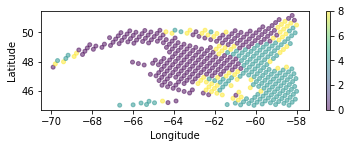

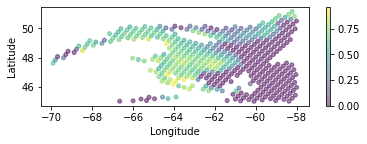

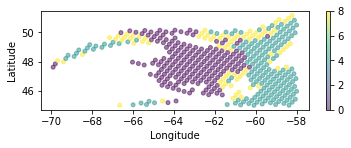

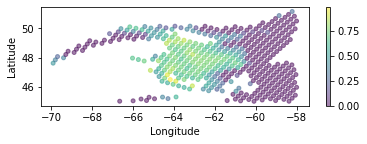

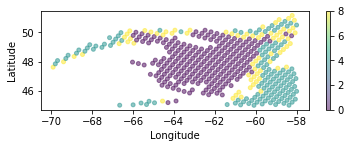

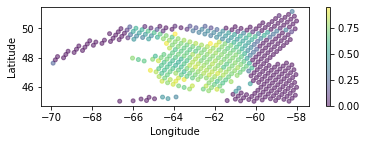

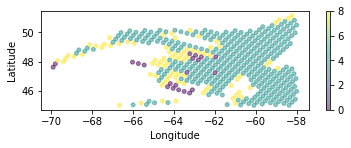

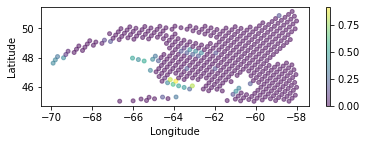

In [21]:
for k in range (len(mylist)):
    Data=xr.open_dataset(mylist[k])

 #define the variables
    lat_esa=np.asarray(Data.lat)
    lon_esa=np.asarray(Data.lon)
    ice_conc=np.asarray(Data.ice_conc.squeeze())
    total_error=np.asarray(Data.total_standard_error.squeeze())
    smearing_error=np.asarray(Data.smearing_standard_error.squeeze())
    algorithm_error=np.asarray(Data.algorithm_standard_error.squeeze())
    status_flag=np.asarray(Data.status_flag.squeeze())
 #define the GSL boundaries
    latmax=52
    latmin=45
    lonmax=-58
    lonmin=-70
    ikeep=0
 #set the variables used in the loop
    latk=[]
    lonk=[]
    ice_conck=[]
    total_errork=[]
    smearing_errork=[]
    algorithm_errork=[]
    status_flagk=[]

 # select the data based on specific criteria
    for i in range(len(lat_esa)):
        for j in range (len(lat_esa)):
            if (lat_esa[i,j] < latmax and lat_esa[i,j] > latmin
                and lon_esa[i,j] < lonmax and lon_esa[i,j] > lonmin
                and ice_conc[i,j] >= 0 and status_flag[i,j] != 1):
                    ikeep=ikeep+1
                    latk.append(lat_esa[i,j])
                    lonk.append(lon_esa[i,j])
                    ice_conck.append(ice_conc[i,j]/100)
                    total_errork.append(total_error[i,j])
                    smearing_errork.append(smearing_error[i,j]/100)
                    algorithm_errork.append(algorithm_error[i,j])
                    status_flagk.append(status_flag[i,j])
                    
    plt.subplot(211)
    plt.scatter(lonk,latk,4**2,status_flagk,alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar()
    plt.show()
    
    plt.subplot(212)
    plt.scatter(lonk,latk,4**2,ice_conck,alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar()
    plt.show()